# Lab 11, Unsupervised Learning 





This  lab session focuses on excercising unsupervised learning algorithm using Scikit-learn.

In Tuesday's class you had an opportunity to learn about the clustering, different methodologies and metrics for performance evaluation. 

Datasets: blobs, moons and UCI wine red dataset.

Useful Links: https://scikit-learn.org/stable/modules/classes.html

## Autograder Setup

Code establishing a condition so that you don't have to worry about commenting out lines of code before submitting.

In [1]:
import re
import os
if re.search(r'amzn', os.uname().release): 
    GS = True
else: 
    GS = False
GS

False

In [2]:
if GS==False:
    print("Installing otter:")
    !pip install otter-grader
    !wget https://pages.mtu.edu/~lebrown/un5550-f22/labs/lab11/lab11.files.zip
    !unzip lab11.files.zip

Installing otter:
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 204 kB 3.9 MB/s 
     |████████████████████████████████| 98 kB 6.9 MB/s 
     |████████████████████████████████| 297 kB 47.3 MB/s 
     |████████████████████████████████| 1.6 MB 31.6 MB/s 
     |████████████████████████████████| 46 kB 3.9 MB/s 
     |████████████████████████████████| 84 kB 3.0 MB/s 
--2022-11-17 04:35:05--  https://pages.mtu.edu/~lebrown/un5550-f22/labs/lab11/lab11.files.zip
Resolving pages.mtu.edu (pages.mtu.edu)... 141.219.70.232
Connecting to pages.mtu.edu (pages.mtu.edu)|141.219.70.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1480 (1.4K) [application/zip]
Saving to: ‘lab11.files.zip’

lab11.files.zip     100%[===================>]   1.45K  --.-KB/s    in 0s      

2022-11-17 04:35:06 (157 MB/s) - ‘lab11.files.zip’ saved [1480/1480]

Archive:  lab11.files.zip
   creating: tests/


## Lab Setup 

Import packages, setup otter. 

In [3]:
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline 


import seaborn as sns

import otter
grader = otter.Notebook()

from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples
from sklearn import metrics

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn import preprocessing

rng_seed = 42

## Clustering

Read through section 7.2.3 of the textbook. 



## Blobs Data 

For the next several exercises, you will use the "blobs" data set. 

## Ex1A.  Load Blobs data

In [4]:
# Make use of the sklearn datasets - make blobs and moons 

# Use make blobs with 150 samples, 3 centers, 2 features, 
#  std. dev. of 3.2, shuffle=True, and random state = 1 

X, y = make_blobs(n_samples = 150, centers=3, n_features=2, cluster_std=3.2, shuffle=True, random_state=5550)


In [5]:
grader.check("q1a")

q1a results: All test cases passed!

<!-- BEGIN QUESTION -->

## Ex1B. Visualize the data 

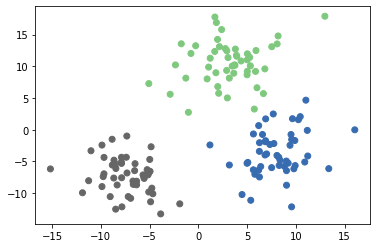

In [6]:
# Use plt.scatter to visualize your blobs data set 
#  Use the 'Accent' - Qualitative Colormap 
#  Each class should be the same shape but different color

plt.scatter(X[:,0],X[:,1],c=y,cmap='Accent');


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Ex2. K-means clustering

Here you will become familiar with using K-means clustering.

The KMeans method is available in `scikit-learn`: 

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Examine the parameters options that you have with KMeans. 



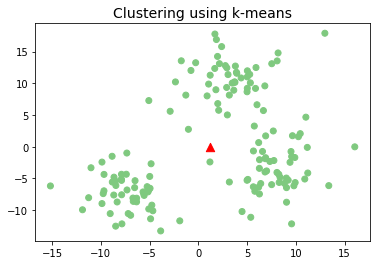

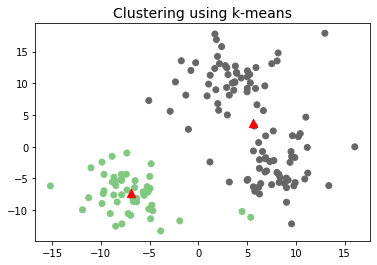

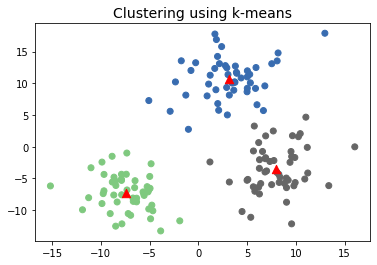

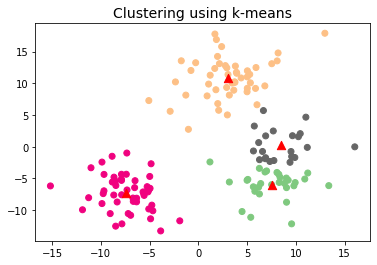

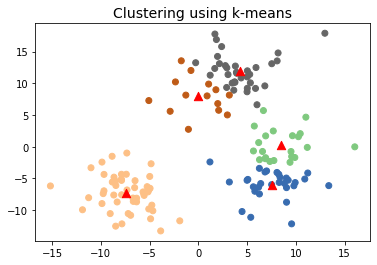

In [7]:
# Import KMeans from sklearn 
# from sklearn.cluster import KMeans

# Select the parameters for KMeans based on your undestanding, 
#  make random_state = 0

# Explore runnning KMeans for clusters, k=1, 2, ..., 5
for i in range(1,6):
    km = KMeans(n_clusters=i, init='k-means++', random_state= 0) 
    yhat = km.fit_predict(X)

# Plot the Clusters 
#  Use the 'Accent' - Qualitative Colormap 
#  Each class should be the same shape but different color
#  Add the cluster centroids with a red triangle. 
    df = pd.DataFrame(data=[X[:,0],X[:,1], yhat]).transpose()
    plt.scatter(df[0], df[1], c=df[2], cmap=plt.get_cmap('Accent'))
    plt.title('Clustering using k-means', size=14)
    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 70,  marker='^',c = 'red', label = 'Centroid');
    plt.show()


<!-- END QUESTION -->

Let's now loook to evaluate the model and quantify the quality of the clustering.  From the textbook/class you were introduced to different metrics or measures - Rand Index, Homogeneity, Completeness, V-measures, Silhouette scores, etc. 


<!-- BEGIN QUESTION -->

## Ex3. Quantify Clustering Quality 

For the above model, let's evaluate the inertia and visualize it for different clusters (1-10). 

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://scikit-learn.org/stable/modules/clustering.html


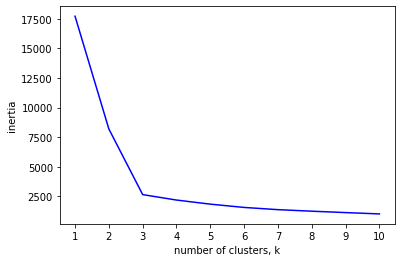

In [8]:
''' Using a for loop, fit the kmeans models for n-clusters from 1 to 10, 
let random state be 0, maxx iter = 100, n_init = 10.

Step 1: initialize the model
Step 2: fit the model
Step 3: append the kmeans model interia_ to a list  


Plot inertia vs. k  after the loop
'''

inert = []
ks = range(1,11)
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', random_state= 0,  max_iter=100, n_init=10) 
    yhat = km.fit_predict(X)
    inert.append(km.inertia_)



plt.plot(ks,inert,color='blue')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

<!-- END QUESTION -->

### Example: Clustering Quality - Silhouette Plots

Check the performance of kMeans using Silhouette plots.  
Try for different values of n_clusters.   
When is it good and when does it go bad??

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html

http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

In [9]:
'''silhouette is to be imported from metrics package'''

# from sklearn.metrics import silhouette_samples

''' Try changing the number of clusters and observing the result 
on the silhouette plots. 
'''
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

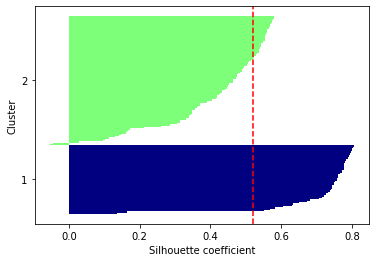

In [10]:
""" No modification needed"""

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

## Clustering Moons data set  

For this problem, we are going to examine clustering methods on the moons data set.


First, we will create the data and plot the data.

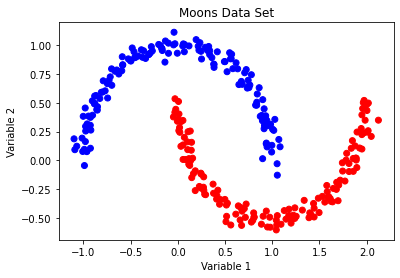

In [11]:
X, y = make_moons(n_samples=300, noise=0.05, random_state=0)

fig, ax = plt.subplots()
sc = ax.scatter(X[:,0], X[:,1], c=y, marker='o', cmap='bwr')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Moons Data Set');

The Moons data is a classic example of a data set that KMeans fails to cluster well. 

## Ex4A. Run KMeans on Moons data 

 

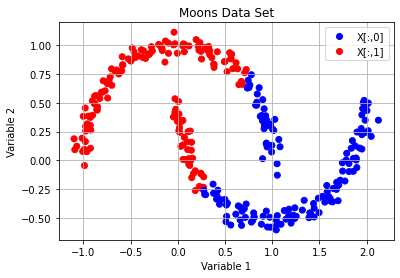

In [12]:
''' Run KMeans on the moons data and predict the cluster labels 
Use random state= 1
'''
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=1)
y_km = km.fit_predict(X)

# Visualize the results, make sure to add a legend 
fig, ax = plt.subplots()
sc = ax.scatter(X[:,0], X[:,1], c=y_km, marker='o', cmap='bwr')
plt.legend(handles = sc.legend_elements()[0], labels=["X[:,0]", "X[:,1]"])
ax.grid(True)
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Moons Data Set');

In [13]:
grader.check("q4a")

q4a results: All test cases passed!

## Ex4B. Hierarchical Clustering 

Let's now look at performing hierarchical clustering on the moons data set. 

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

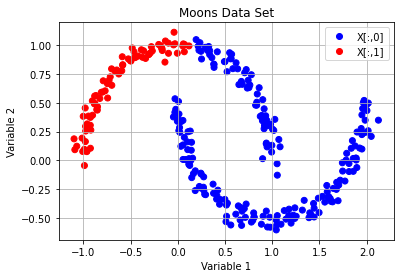

In [14]:
''' Run Agglomerative Clustering on the moons data and 
predict the cluster labels 
Use complete linkage
'''
hc = AgglomerativeClustering(n_clusters=2, linkage='complete').fit(X)
y_hc = hc.fit_predict(X)


# Visualize the results, make sure to add a legend 
fig, ax = plt.subplots()
sc = ax.scatter(X[:,0], X[:,1], c=y_hc, marker='o', cmap='bwr')
plt.legend(handles = sc.legend_elements()[0], labels=["X[:,0]", "X[:,1]"])
ax.grid(True)
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Moons Data Set');


In [15]:
grader.check("q4b")

q4b results: All test cases passed!

From the plot of the moons data the Agglomerative clustering method is not efficient (neither is Kmeans).  This is because the cluster have a non-convex shape. 

### Other Clustering Methods

Let's look to use another clustering methods DBSCAN (not discussed in class).  DBSCAN handles clustering data of arbitrary shapes efficiently. 

http://scikit-learn.org/stable/modules/clustering.html#dbscan

In [16]:
''' Import DBscan from sklearn, use eps = 0.2, min_samples = 5, metric = 'euclidean' '''

# from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)

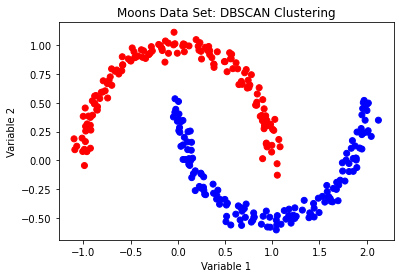

In [17]:
''' plot cluster results for DBSCAN'''
fig, ax = plt.subplots()
sc = ax.scatter(X[:,0], X[:,1], c=y_db, marker='o', cmap='bwr')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Moons Data Set: DBSCAN Clustering');

### Example. Evaluate Cluster Performance 

http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

Evaluate, the Kmeans, Hierarchical and DBScan method on the moons data set, using the clustering metrics below. Note, they may not all be applicable to each clustering method.

In [18]:
''' Using piece of code from class, evaluate the performance of all the 
above clustering techniques'''
# from sklearn import metrics

print ('Final evaluation of the clustering: K-Means')
print('Inertia: %.2f' %  km.inertia_ )
print('Adjusted_rand_score %.2f' % metrics.adjusted_rand_score(y,km.labels_))
print('Homogeneity %.2f' %  metrics.homogeneity_score(y,km.labels_))
print('Completeness %.2f' %  metrics.completeness_score(y,km.labels_))
print('V_measure %.2f' %  metrics.v_measure_score(y, km.labels_))
print('Silhouette %.2f' %  metrics.silhouette_score(X, km.labels_, metric='euclidean'))

Final evaluation of the clustering: K-Means
Inertia: 121.14
Adjusted_rand_score 0.24
Homogeneity 0.18
Completeness 0.18
V_measure 0.18
Silhouette 0.49


In [19]:
print ('Final evaluation of the clustering: Hier ')
# print('Inertia: %.2f' %  db.inertia_ )
print('Adjusted_rand_score %.2f' % metrics.adjusted_rand_score(y, hc.labels_))
print('Homogeneity %.2f' %  metrics.homogeneity_score(y, hc.labels_))
print('Completeness %.2f' %  metrics.completeness_score(y, hc.labels_))
print('V_measure %.2f' %  metrics.v_measure_score(y, hc.labels_))
print('Silhouette %.2f' %  metrics.silhouette_score(X, hc.labels_, metric='euclidean'))

Final evaluation of the clustering: Hier 
Adjusted_rand_score 0.30
Homogeneity 0.35
Completeness 0.41
V_measure 0.38
Silhouette 0.44


In [20]:
print ('Final evaluation of the clustering: DBSCAN ')
# print('Inertia: %.2f' %  db.inertia_ )
print('Adjusted_rand_score %.2f' % metrics.adjusted_rand_score(y, db.labels_))
print('Homogeneity %.2f' %  metrics.homogeneity_score(y, db.labels_))
print('Completeness %.2f' %  metrics.completeness_score(y, db.labels_))
print('V_measure %.2f' %  metrics.v_measure_score(y, db.labels_))
print('Silhouette %.2f' %  metrics.silhouette_score(X, db.labels_, metric='euclidean'))

Final evaluation of the clustering: DBSCAN 
Adjusted_rand_score 1.00
Homogeneity 1.00
Completeness 1.00
V_measure 1.00
Silhouette 0.33


## Wine Data Clustering 

From UCI repository, download the wine dataset and apply k-Means and Hierarchical clustering methods.

https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

In [21]:
''' Lets try on the real dataset.
we have used the wine dataset earlier. we would be using this for clustering 
application and since we know that the target group 
is the wine quality and is a part of this dataset in the link'''

'''From the url given, import the dataset using pd.read_csv,
make necessary changes for successfully reading this data
update the column names with the data description given in the UCI link'''

url  =  "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data" 
wine = pd.read_csv(url,sep = ',', header=None)
wine.columns = ['class', 'Alcohol','Malic acid','Ash','Alcalinity of ash' ,
                'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
                'Proanthocyanins','color intensity','Hue','OD280/OD315 of diluted wines',
                'Proline']

In [22]:
''' since, target class is also part of the data, slice the data and assign the 
target to y and remaining data to variable X'''
X = wine.iloc[:, 1:14]
y = wine.iloc[:, 0]

In [23]:
wine.describe()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<!-- BEGIN QUESTION -->

### Ex5. Clustering on Wine Data

First, standardize the data so that it all has mean = 0, std = 1 for each column. 

Then, run KMeans clustering for k= 2, 3, ..., 10,  use random_state = 0.

Record the inertia and adjusted rand score for each number of groups. 

Plot (2 plots side-by-side) the inertia and adjusted rand score vs. the number of groups. 

[1659.0079672511501, 1278.7607763668148, 1175.705192819712, 1113.020882168209, 1044.0780493140435, 999.5493686263304, 951.4917384013686, 889.5309779249258, 851.8813851482952]
[0.38872424979619347, 0.9148795960669529, 0.7491735027058888, 0.6372153629852392, 0.6842384151982096, 0.5540071052965985, 0.39553266060117975, 0.42695727651093207, 0.37524929663837453]


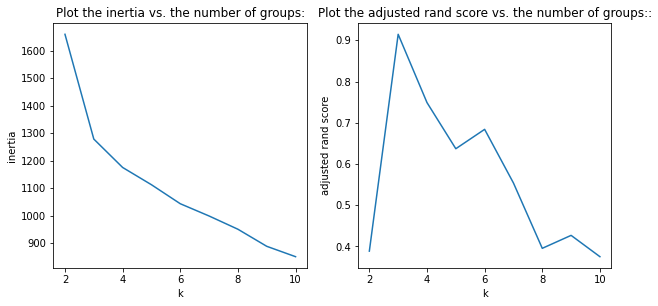

In [24]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.scale(X)  

inert = []
ari = []

kvals = range(2,11)
for k in kvals:
    km = KMeans(n_clusters=k, random_state= 0) 
    km.fit(scaler)
    inert.append(km.inertia_)
    ari.append(metrics.adjusted_rand_score(y, km.labels_))

# plots 
plt.figure(figsize=(10,4.5))
plt.subplot(1,2,1)
plt.plot(kvals,inert)
plt.title('Plot the inertia vs. the number of groups:');
plt.xlabel('k');
plt.ylabel('inertia');

plt.subplot(1,2,2)
plt.plot(kvals,ari)
plt.title('Plot the adjusted rand score vs. the number of groups::');
plt.xlabel('k');
plt.ylabel('adjusted rand score');



print(inert)
print(ari)


<!-- END QUESTION -->

